In [363]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.pipeline import make_pipeline




from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Load Data


In [3]:
df = pd.read_csv('dataset/player_data_full.csv')

/var/folders/xp/fzj8h07x52n24_x835lrmtbr0000gn/T/ipykernel_29039/1540017527.py:1: DtypeWarning: Columns (34,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset/player_data_full.csv')


In [359]:
df.shape

(18378, 75)

In [404]:
print("Number of Columns: ", df.shape[0])
print("Number of Rows: ", df.shape[1])

Number of Columns:  18378
Number of Rows:  75


In [5]:
df.head()

,version,version_date,name,full_name,short_name,description,image,height,weight,positions,...,composure,defensive_awareness,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,play_styles
0,240005,2023-10-05,Erling Haaland,Erling Braut Haaland,E. Haaland,"Erling Haaland (Erling Braut Haaland, born 21 ...",https://cdn.sofifa.net/players/239/085/24_120.png,195,207,ST,...,87,38,47,29,7,14,13,11,7,"Acrobatic +,Power Header,Quick Step"
1,240005,2023-10-05,Kylian Mbappé,Kylian Mbappé Lottin,K. Mbappé,"Kylian Mbappé (Kylian Mbappé Lottin, born 20 D...",https://cdn.sofifa.net/players/231/747/24_120.png,182,165,"ST,LW",...,88,26,34,32,13,5,7,11,6,"Quick Step +,Rapid,Flair,Trivela"
2,240005,2023-10-05,Kevin De Bruyne,Kevin De Bruyne,K. De Bruyne,Kevin De Bruyne (born 28 June 1991) is a Belgi...,https://cdn.sofifa.net/players/192/985/24_120.png,181,165,"CM,CAM",...,88,66,70,53,15,13,5,10,13,"Pinged Pass +,Dead Ball,Incisive Pass,Long Bal..."
3,240005,2023-10-05,Harry Kane,Harry Kane,H. Kane,Harry Kane (born 28 July 1993) is a British fo...,https://cdn.sofifa.net/players/202/126/24_120.png,188,187,ST,...,92,46,46,38,8,10,11,14,11,"Pinged Pass +,Long Ball Pass,First Touch,Trivela"
4,240005,2023-10-05,Thibaut Courtois,Thibaut Nicolas Marc Courtois,T. Courtois,Thibaut Courtois (Thibaut Nicolas Marc Courtoi...,https://cdn.sofifa.net/players/192/119/24_120.png,199,212,GK,...,66,20,18,16,85,89,76,90,93,Far Throw


In [6]:
df.describe()


,version,height,weight,profile_weak_foot,profile_skill_moves,profile_international_reputation,profile_id,country_id,country_rating,country_kit_number,...,penalties,composure,defensive_awareness,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,18484.0,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,786.000000,786.000000,786.000000,...,18484.000000,18484.000000,18484.00000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000
mean,240005.0,181.688433,165.769747,2.940760,2.386172,1.086183,242713.256600,22815.912214,76.866412,13.791349,...,47.809890,57.986799,46.69103,48.578771,46.375676,16.276023,16.071846,15.977115,16.117669,16.370969
std,0.0,6.877031,15.386102,0.679665,0.773608,0.361074,26695.153941,43306.332347,5.045648,8.238776,...,15.666667,12.101638,20.38689,21.012038,20.532319,17.514421,16.887265,16.632759,17.037875,17.822736
min,240005.0,156.000000,108.000000,1.000000,1.000000,1.000000,18115.000000,1318.000000,67.000000,1.000000,...,8.000000,13.000000,3.00000,8.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,240005.0,177.000000,154.000000,3.000000,2.000000,1.000000,225746.000000,1337.000000,74.000000,7.000000,...,38.000000,51.000000,29.00000,29.000000,26.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,240005.0,182.000000,165.000000,3.000000,2.000000,1.000000,245644.000000,1357.500000,76.000000,14.000000,...,49.000000,59.000000,52.00000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240005.0,187.000000,176.000000,3.000000,3.000000,1.000000,264311.250000,1387.000000,82.000000,20.000000,...,59.000000,66.000000,63.00000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,240005.0,206.000000,231.000000,5.000000,5.000000,5.000000,278762.000000,111527.000000,85.000000,97.000000,...,92.000000,96.000000,91.00000,91.000000,90.000000,90.000000,90.000000,91.000000,90.000000,93.000000


## Data-Preprocessing

### Clening the 'value' 'wage' & 'profile_release_clause' columns

In [7]:
# Cleaning code for 'Value' column in DataFrame 'df'
df['value'] = df['value'].str.replace('€', '')  # Remove Euro symbol
df['value'] = df['value'].str.replace('M', '')  # Remove 'M' suffix for millions
df.loc[df['value'].str.contains('K'), 'value'] = df['value'].str.split('K').str[0].astype(float) / 1000  # Convert 'K' suffix for thousands to decimal
df['value'] = round(df['value'].astype(float), 2)  # Convert to float and round to 2 decimal places
df = df[df['value'] > 0]  # Filter out values less than or equal to 0

In [8]:
# Cleaning code for 'Wage' column in DataFrame 'df'
df['wage'] = df['wage'].str.replace('€', '')  # Remove Euro symbol
df.loc[df['wage'].str.contains('K'), 'wage'] = df['wage'].str.split('K').str[0].astype(float) * 1000  # Convert 'K' suffix for thousands to decimal
df['wage'] = round(df['wage'].astype(float) / 1000000, 5)  # Convert to million (divide by 1,000,000) and round to 5 decimal places

/var/folders/xp/fzj8h07x52n24_x835lrmtbr0000gn/T/ipykernel_29039/3753588742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wage'] = df['wage'].str.replace('€', '')  # Remove Euro symbol
/var/folders/xp/fzj8h07x52n24_x835lrmtbr0000gn/T/ipykernel_29039/3753588742.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wage'] = round(df['wage'].astype(float) / 1000000, 5)  # Convert to million (divide by 1,000,000) and round to 5 decimal places


In [9]:
#Missing values in 'profile_release_clause' column
missing_values = df[df['profile_release_clause'].isna()]
missing_values

,version,version_date,name,full_name,short_name,description,image,height,weight,positions,...,composure,defensive_awareness,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,play_styles


In [10]:
# Filter the DataFrame to get rows with 'undefined' values in 'player_release_clause' column
undefined_players_df = df[df['profile_release_clause'] == 'undefined']

# Extract the names of players with 'undefined' release clause
undefined_players = undefined_players_df['profile_release_clause'].tolist()

undefined_players

['undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'undefined',
 'unde

In [11]:
changed_rows = df[df['profile_release_clause'] != df.apply(lambda row: row['value'] if row['profile_release_clause'] == 'undefined' else row['profile_release_clause'], axis=1)]
print(changed_rows[['name', 'profile_release_clause']])

                        name profile_release_clause
53              João Cancelo              undefined
134            Romelu Lukaku              undefined
271                   Joselu              undefined
285               João Félix              undefined
290           Arnaut Danjuma              undefined
...                      ...                    ...
18211          Yousef Hagawi              undefined
18244             Joe Wright              undefined
18252  Abdulaziz Al Ouwiradi              undefined
18308           Givson Singh              undefined
18431       Sweden Fernandes              undefined

[1196 rows x 2 columns]


In [12]:
# Make a copy of the original DataFrame
df_1 = df.copy()

# Drop rows where 'profile_release_clause' is 'undefined'
df_1 = df_1[df_1['profile_release_clause'] != 'undefined']

# Reset the index after dropping rows
df_1 = df_1.reset_index(drop=True)

In [13]:
df_1.shape

(17182, 75)

In [14]:
# Cleaning code for 'Value' column in DataFrame 'df_1'
df_1['profile_release_clause'] = df_1['profile_release_clause'].str.replace('€', '')  # Remove Euro symbol
df_1['profile_release_clause'] = df_1['profile_release_clause'].str.replace('m', '')  # Remove 'M' suffix for millions
df_1.loc[df_1['profile_release_clause'].str.contains('k'), 'profile_release_clause'] = df_1['profile_release_clause'].str.split('k').str[0].astype(float) / 1000  # Convert 'K' suffix for thousands to decimal
df_1['profile_release_clause'] = round(df_1['profile_release_clause'].astype(float), 2)  # Convert to float and round to 2 decimal places

In [15]:
print(df_1[['value', 'wage', 'profile_release_clause']])


        value    wage  profile_release_clause
0      185.00  0.3400                  356.10
1      181.50  0.2300                  349.40
2      103.00  0.3500                  190.60
3      119.50  0.1700                  197.20
4       63.00  0.2500                  129.20
...       ...     ...                     ...
17177    0.11  0.0005                    0.22
17178    0.10  0.0010                    0.18
17179    0.11  0.0005                    0.24
17180    0.09  0.0010                    0.16
17181    0.07  0.0010                    0.12

[17182 rows x 3 columns]


In [16]:
df_1[['value', 'wage', 'profile_release_clause']].describe()

,value,wage,profile_release_clause
count,17182.000000,17182.000000,17182.000000
mean,2.843264,0.008469,5.374518
std,7.690462,0.018757,14.870425
min,0.010000,0.000500,0.010000
25%,0.480000,0.001000,0.810000
50%,0.980000,0.003000,1.700000
75%,2.000000,0.007000,3.700000
max,185.000000,0.350000,356.100000


### cleaning the 'overall_rating' & 'potential' columns

In [17]:
# Filter rows where 'overall_rating' is not in the format '68' or '70'
filtered_df = df_1[(df_1['overall_rating'].str.len() > 2) & (df_1['overall_rating'].str.contains('[0-9]+\+[0-9]+'))]

# Print the 'name' and 'overall_rating' columns of the filtered rows
print(filtered_df[['name', 'overall_rating']])

                       name overall_rating
336            Mauro Icardi           81+1
373    Lutsharel Geertruida           80+1
385            Eberechi Eze           80+1
411        Alexandr Golovin           80+1
489        Santiago Giménez           79+1
...                     ...            ...
16806     Thomas Waddingham           52+2
16834     Mohammed Harboush           52+1
16895         Patrick Beach           51+1
16913         Alex Robinson           51+1
17064            Liu Haofan           50+1

[318 rows x 2 columns]


In [18]:
# Convert 'overall_rating' column to string type
df_1['overall'] = df_1['overall_rating'].astype(str)

# Extract the first two digits from each value in 'overall' column
df_1['overall'] = df_1['overall'].str.extract('(\d{2})')

# Convert 'overall' column to integer type
df_1['overall'] = df_1['overall'].astype(int)

In [19]:
df_1['overall'].value_counts()

64    1094
65    1078
67    1069
66    1060
63     993
68     940
69     896
62     866
70     821
71     706
61     685
60     683
72     629
73     545
59     489
74     471
58     453
57     370
75     362
56     351
55     306
76     289
54     267
77     223
53     213
52     193
78     186
79     150
51     130
80     110
50     100
81      89
82      75
83      55
84      50
49      45
48      37
85      30
86      25
47      13
87      10
89       9
88       8
90       5
91       3
Name: overall, dtype: int64

In [20]:
# Filter rows where 'overall_rating' is not in the format '68' or '70'
filtered_df = df_1[(df_1['potential'].str.len() > 2) & (df_1['potential'].str.contains('[0-9]+\+[0-9]+'))]

# Print the 'name' and 'overall_rating' columns of the filtered rows
print(filtered_df[['name', 'potential']])

                       name potential
336            Mauro Icardi      81+1
373    Lutsharel Geertruida      86+1
385            Eberechi Eze      85+1
411        Alexandr Golovin      80+1
489        Santiago Giménez      85+1
...                     ...       ...
16597         Noel Caliskan      61+1
16806     Thomas Waddingham      69+3
16834     Mohammed Harboush      66+1
16913         Alex Robinson      68+1
17064            Liu Haofan      62+1

[263 rows x 2 columns]


In [21]:
# Convert 'potential' column to string type
df_1['potential_rating'] = df_1['potential'].astype(str)

# Extract the first two digits from each value in 'overall' column
df_1['potential_rating'] = df_1['potential_rating'].str.extract('(\d{2})')

# Convert 'overall' column to integer type
df_1['potential_rating'] = df_1['potential_rating'].astype(int)

In [24]:
df_1['potential_rating'].value_counts()

70    1106
69    1102
72    1101
71    1054
68    1036
73    1018
74     972
67     934
66     839
75     806
65     801
64     688
76     686
77     543
63     522
78     513
79     449
62     405
80     395
81     291
61     280
82     249
60     238
83     196
84     171
59     156
85     109
58     102
57      85
86      74
56      57
87      33
88      30
55      28
54      26
89      21
53      19
90      15
52       9
91       7
51       5
50       3
94       3
92       3
93       1
49       1
Name: potential_rating, dtype: int64

### removing multiple values from 'positions' column

In [32]:
position_counts = df['positions'].value_counts()
position_counts


CB            2393
GK            2028
ST            1661
CDM,CM         938
CM,CDM         729
              ... 
CAM,ST,RWB       1
CB,CDM,LWB       1
LM,LB,RB         1
LM,ST,RB         1
LM,RWB,RM        1
Name: positions, Length: 722, dtype: int64

In [33]:
# Split the strings in 'positions' column by comma and keep only the first value
df_1['positions_new'] = df_1['positions'].str.split(',').str[0]

In [34]:
position_counts = df_1['positions_new'].value_counts()
position_counts


CB     3103
ST     2234
CM     2071
GK     1936
CDM    1434
RB     1119
LB     1113
CAM     970
LM      908
RM      866
RW      431
LW      382
RWB     271
LWB     232
CF      112
Name: positions_new, dtype: int64

### calculating 'age' from DOB column

In [22]:
# Convert 'dob' column to datetime format
df_1['dob'] = pd.to_datetime(df_1['dob'])

# Calculate age based on 'dob' column
current_date = datetime.now()
df_1['age'] = (current_date - df_1['dob']).astype('<m8[Y]').astype(int)

In [23]:
# Print the DataFrame with the 'age' column added
print(df_1[['full_name', 'dob', 'age']])

                           full_name        dob  age
0               Erling Braut Haaland 2000-07-21   23
1               Kylian Mbappé Lottin 1998-12-20   25
2                    Kevin De Bruyne 1991-06-28   32
3                         Harry Kane 1993-07-28   30
4      Thibaut Nicolas Marc Courtois 1992-05-11   31
...                              ...        ...  ...
17177                  Aphaoba Singh 2004-01-06   20
17178                            金良宽 2002-01-28   22
17179                            叶道鑫 2005-11-03   18
17180                             尹杰 2001-09-25   22
17181                            吴宇航 2001-02-16   23

[17182 rows x 3 columns]


In [28]:
df_1.describe()

,version,height,weight,value,wage,profile_weak_foot,profile_skill_moves,profile_international_reputation,profile_release_clause,profile_id,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,overall,potential_rating,age,value_log
count,17182.0,17182.000000,17182.000000,17182.000000,17182.000000,17182.000000,17182.000000,17182.000000,17182.000000,17182.000000,...,17182.000000,17182.000000,17182.000000,17182.000000,17182.000000,17182.000000,17182.000000,17182.000000,17182.000000,17182.000000
mean,240005.0,181.665929,165.839192,2.843264,0.008469,2.936038,2.376440,1.088523,5.374518,242185.863986,...,46.455535,16.397334,16.199802,16.095216,16.239786,16.483704,65.765510,70.855488,26.211791,0.044783
std,0.0,6.892856,15.393586,7.690462,0.018757,0.679410,0.772888,0.366227,14.870425,26878.591745,...,20.558651,17.633151,17.005053,16.744662,17.159438,17.943345,6.878477,6.255517,4.793059,1.246656
min,240005.0,156.000000,108.000000,0.010000,0.000500,1.000000,1.000000,1.000000,0.010000,18115.000000,...,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,47.000000,49.000000,17.000000,-4.605170
25%,240005.0,177.000000,154.000000,0.480000,0.001000,3.000000,2.000000,1.000000,0.810000,224883.500000,...,26.000000,8.000000,8.000000,8.000000,8.000000,8.000000,61.000000,67.000000,22.000000,-0.733969
50%,240005.0,182.000000,165.000000,0.980000,0.003000,3.000000,2.000000,1.000000,1.700000,244818.500000,...,54.000000,11.000000,11.000000,11.000000,11.000000,11.000000,66.000000,71.000000,26.000000,-0.020203
75%,240005.0,187.000000,176.000000,2.000000,0.007000,3.000000,3.000000,1.000000,3.700000,264251.750000,...,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,70.000000,75.000000,30.000000,0.693147
max,240005.0,206.000000,231.000000,185.000000,0.350000,5.000000,5.000000,5.000000,356.100000,278762.000000,...,90.000000,90.000000,90.000000,91.000000,90.000000,93.000000,91.000000,94.000000,44.000000,5.220356


## EDA

### Summary tables

In [364]:
# Top 5 Valuable Players
top_valuable_players = df_1.nlargest(5, 'value')
top_valuable_players_table = top_valuable_players[['full_name', 'age', 'club_name', 'value']].reset_index(drop=True)
top_valuable_players_table.index += 1  # Start index from 1
top_valuable_players_table = top_valuable_players_table.rename(columns={'full_name': 'Name', 'club_name': 'Club Name'})
top_valuable_players_table.index.name = 'Rank'
top_valuable_players_table_border = tabulate(top_valuable_players_table, headers='keys', tablefmt='fancy_grid')

print("Top 5 Valuable Players:")
print(top_valuable_players_table_border)

# Top 5 Rating Players
top_rating_players = df_1.nlargest(5, 'overall')
top_rating_players_table = top_rating_players[['full_name', 'age', 'club_name', 'overall']].reset_index(drop=True)
top_rating_players_table.index += 1  # Start index from 1
top_rating_players_table = top_rating_players_table.rename(columns={'full_name': 'Name', 'club_name': 'Club Name'})
top_rating_players_table.index.name = 'Rank'
top_rating_players_table_border = tabulate(top_rating_players_table, headers='keys', tablefmt='fancy_grid')

print("\nTop 5 Rating Players:")
print(top_rating_players_table_border)

# Mean Value (Top 5) based on Position
top_5_positions = df_1.groupby('positions_new')['value'].mean().nlargest(5)
top_5_positions_table = pd.DataFrame(top_5_positions).reset_index()
top_5_positions_table = top_5_positions_table.rename(columns={'positions_new': 'Position', 'value': 'Mean Value'})
top_5_positions_table.index.name = 'Rank'
top_5_positions_table_border = tabulate(top_5_positions_table, headers='keys', tablefmt='fancy_grid')

print("\nMean Value (Top 5) based on Position:")
print(top_5_positions_table_border)

# Top 5 Clubs (Mean Value)
top_5_clubs_mean_value = df_1.groupby('club_name')['value'].mean().nlargest(5)
top_5_clubs_mean_value_table = pd.DataFrame(top_5_clubs_mean_value).reset_index()
top_5_clubs_mean_value_table = top_5_clubs_mean_value_table.rename(columns={'club_name': 'Club Name', 'value': 'Mean Value'})
top_5_clubs_mean_value_table.index.name = 'Rank'
top_5_clubs_mean_value_table_border = tabulate(top_5_clubs_mean_value_table, headers='keys', tablefmt='fancy_grid')

print("\nTop 5 Clubs (Mean Value):")
print(top_5_clubs_mean_value_table_border)

# Top 5 Clubs (Total Value)
top_5_clubs_total_value = df_1.groupby('club_name')['value'].sum().nlargest(5)
top_5_clubs_total_value_table = pd.DataFrame(top_5_clubs_total_value).reset_index()
top_5_clubs_total_value_table = top_5_clubs_total_value_table.rename(columns={'club_name': 'Club Name', 'value': 'Total Value'})
top_5_clubs_total_value_table.index.name = 'Rank'
top_5_clubs_total_value_table_border = tabulate(top_5_clubs_total_value_table, headers='keys', tablefmt='fancy_grid')

print("\nTop 5 Clubs (Total Value):")
print(top_5_clubs_total_value_table_border)


Top 5 Valuable Players:
╒════════╤═════════════════════════════════════════╤═══════╤═════════════════════╤═════════╕
│   Rank │ Name                                    │   age │ Club Name           │   value │
╞════════╪═════════════════════════════════════════╪═══════╪═════════════════════╪═════════╡
│      1 │ Erling Braut Haaland                    │    23 │ Manchester City     │   185   │
├────────┼─────────────────────────────────────────┼───────┼─────────────────────┼─────────┤
│      2 │ Kylian Mbappé Lottin                    │    25 │ Paris Saint Germain │   181.5 │
├────────┼─────────────────────────────────────────┼───────┼─────────────────────┼─────────┤
│      3 │ Vinícius José Paixão de Oliveira Júnior │    23 │ Real Madrid         │   158.5 │
├────────┼─────────────────────────────────────────┼───────┼─────────────────────┼─────────┤
│      4 │ Jamal Musiala                           │    21 │ FC Bayern München   │   134.5 │
├────────┼────────────────────────────────────

### Position distribution pie chart

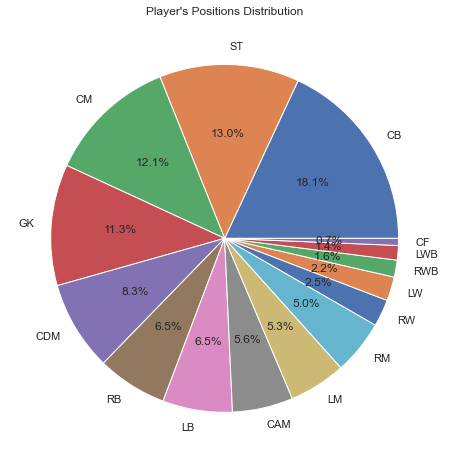

In [413]:
# Player's Positions Distribution - Pie chart
plt.figure(figsize=(10, 8))
position_counts = df_1['positions_new'].value_counts()
pie = plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%')
plt.title('Player\'s Positions Distribution')
plt.savefig('results/Analysis/Player_Positions_Distribution.png')
plt.show()



### player 'value' means based on positions

/var/folders/xp/fzj8h07x52n24_x835lrmtbr0000gn/T/ipykernel_29039/1051477966.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.catplot(y="positions_new", x="value", kind="bar", data=df_1, palette="viridis", order=positions_order)


<Figure size 3000x3000 with 0 Axes>

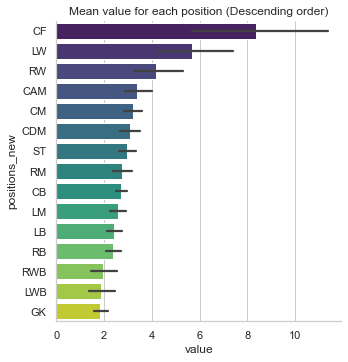

In [414]:
positions_order = df_1.groupby("positions_new")["value"].mean().sort_values(ascending=False).index

plt.figure(figsize=(15, 15), dpi=200)
graph = sns.catplot(y="positions_new", x="value", kind="bar", data=df_1, palette="viridis", order=positions_order)
plt.title("Mean value for each position (Descending order)")
plt.savefig('results/Analysis/Mean_vlue_by_positions.png')
plt.show()


### Target class distributions

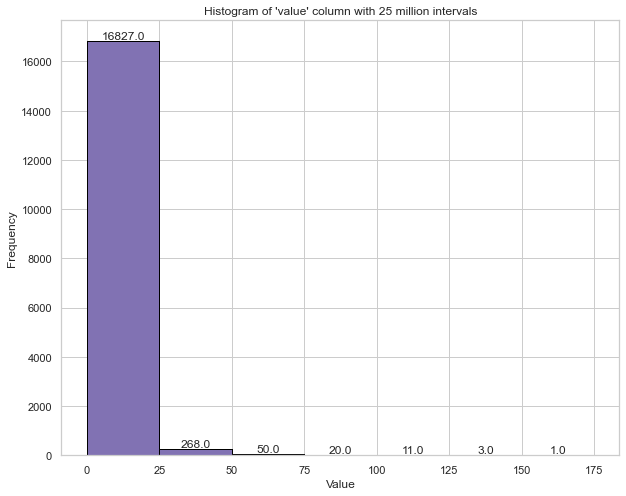

In [415]:
bins = list(range(0, int(df_1["value"].max()) + 1, 25))

plt.figure(figsize=(10, 8))
plt.hist(df_1["value"], bins=bins, edgecolor='black')

# Annotate each bar with the count
for i in range(len(bins) - 1):
    plt.text((bins[i] + bins[i + 1]) / 2, plt.hist(df_1["value"], bins=bins, edgecolor='black')[0][i], 
             str(plt.hist(df_1["value"], bins=bins, edgecolor='black')[0][i]), ha='center', va='bottom')

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of 'value' column with 25 million intervals")
plt.savefig('results/Analysis/value_col_counts_25million_bins.png')
plt.show()


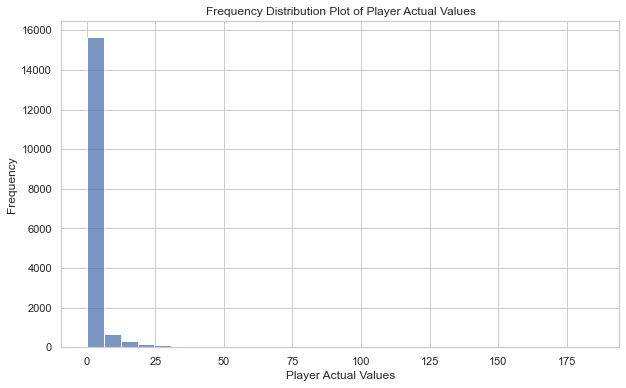

In [416]:
# Frequency Distribution Plot of Player Actual Values
plt.figure(figsize=(10, 6))
sns.histplot(df_1['value'], bins=30, kde=False)
plt.xlabel('Player Actual Values')
plt.ylabel('Frequency')
plt.title('Frequency Distribution Plot of Player Actual Values')
plt.savefig('results/Analysis/Frequency_distribution_value_target_col.png')
plt.show()


In [26]:
# Convert the 'value' column to logarithmic scale
df_1['value_log'] = np.log(df_1['value'])

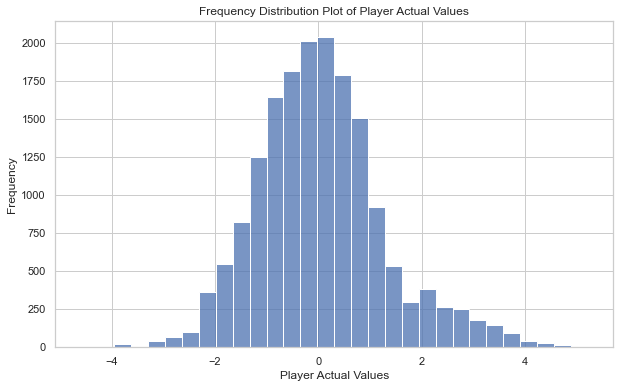

In [417]:
# Frequency Distribution Plot of Player Actual Values
plt.figure(figsize=(10, 6))
sns.histplot(df_1['value_log'], bins=30, kde=False)
plt.xlabel('Player Actual Values')
plt.ylabel('Frequency')
plt.title('Frequency Distribution Plot of Player Actual Values')
plt.savefig('results/Analysis/target_column_log.png')
plt.show()



### Value vs Overall with Profile International Reputation (to drop Profile International Reputation eventually)

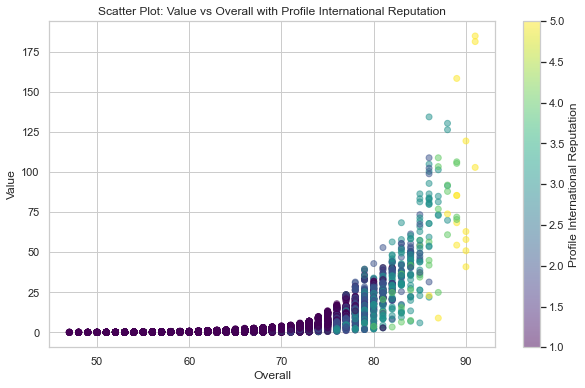

In [418]:
# Extract the columns for plotting
x = df_1['overall']
y = df_1['value']
reputation = df_1['profile_international_reputation']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=reputation, cmap='viridis', alpha=0.5)
plt.colorbar(label='Profile International Reputation')
plt.xlabel('Overall')
plt.ylabel('Value')
plt.title('Scatter Plot: Value vs Overall with Profile International Reputation')
plt.grid(True)
plt.savefig('results/Analysis/Scatter Plot: Value vs Overall with Profile International Reputation.png')
plt.show()



## Correlation

In [98]:
columns_to_convert = [  'age', 'overall', 'potential_rating', 'height', 'weight',
                       'profile_international_reputation', 'wage',
                      'profile_release_clause', 'crossing', 'finishing', 'short_passing', 'volleys',
                      'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'acceleration',
                      'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'strength', 'long_shots',
                      'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure',
                      'defensive_awareness', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
                      'gk_kicking', 'gk_reflexes']

# Convert columns to integer data type
df_new = df_1[columns_to_convert].astype(float)

In [99]:
df_new

,age,overall,potential_rating,height,weight,profile_international_reputation,wage,profile_release_clause,crossing,finishing,...,vision,penalties,composure,defensive_awareness,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_reflexes
0,23.0,91.0,94.0,195.0,207.0,5.0,0.3400,356.10,47.0,96.0,...,74.0,84.0,87.0,38.0,47.0,29.0,7.0,14.0,13.0,7.0
1,25.0,91.0,94.0,182.0,165.0,5.0,0.2300,349.40,78.0,94.0,...,83.0,84.0,88.0,26.0,34.0,32.0,13.0,5.0,7.0,6.0
2,32.0,91.0,91.0,181.0,165.0,5.0,0.3500,190.60,95.0,85.0,...,95.0,83.0,88.0,66.0,70.0,53.0,15.0,13.0,5.0,13.0
3,30.0,90.0,90.0,188.0,187.0,5.0,0.1700,197.20,80.0,95.0,...,87.0,92.0,92.0,46.0,46.0,38.0,8.0,10.0,11.0,11.0
4,31.0,90.0,90.0,199.0,212.0,5.0,0.2500,129.20,14.0,14.0,...,44.0,27.0,66.0,20.0,18.0,16.0,85.0,89.0,76.0,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17177,20.0,47.0,60.0,173.0,143.0,1.0,0.0005,0.22,30.0,47.0,...,44.0,61.0,40.0,18.0,11.0,10.0,7.0,10.0,7.0,6.0
17178,22.0,47.0,55.0,183.0,163.0,1.0,0.0010,0.18,26.0,25.0,...,38.0,38.0,46.0,53.0,52.0,48.0,8.0,13.0,9.0,7.0
17179,18.0,47.0,63.0,175.0,154.0,1.0,0.0005,0.24,26.0,25.0,...,32.0,33.0,36.0,52.0,50.0,46.0,7.0,5.0,6.0,8.0
17180,22.0,47.0,54.0,178.0,163.0,1.0,0.0010,0.16,36.0,32.0,...,46.0,40.0,39.0,35.0,38.0,45.0,7.0,7.0,13.0,14.0


In [100]:
# Check for null values across the dataset
null_values = df_new.isnull().sum()

# Loop through each column to print null values
print("Null values across the dataset:")
for col in df_new.columns:
    print(f"{col}: {null_values[col]}")

Null values across the dataset:
age: 0
overall: 0
potential_rating: 0
height: 0
weight: 0
profile_international_reputation: 0
wage: 0
profile_release_clause: 0
crossing: 0
finishing: 0
short_passing: 0
volleys: 0
dribbling: 0
curve: 0
fk_accuracy: 0
long_passing: 0
ball_control: 0
acceleration: 0
sprint_speed: 0
agility: 0
reactions: 0
balance: 0
shot_power: 0
strength: 0
long_shots: 0
aggression: 0
interceptions: 0
positioning: 0
vision: 0
penalties: 0
composure: 0
defensive_awareness: 0
standing_tackle: 0
sliding_tackle: 0
gk_diving: 0
gk_handling: 0
gk_kicking: 0
gk_reflexes: 0


In [103]:
#View the correlations
corr_mat = df_1.corr()

#Correlation With Value (most correlated with positive)
pd.DataFrame(corr_mat["value"]).sort_values("value", ascending=False).head(10)

,value
value,1.000000
profile_release_clause,0.995171
wage,0.840203
profile_international_reputation,0.661318
value_log,0.645445
country_rating,0.599847
overall,0.553952
potential_rating,0.521619
reactions,0.495817
composure,0.380302


In [104]:
# Attach the 'value_log' column from 'df_1' to 'df_new'
df_new['value'] = df_1['value']

/var/folders/xp/fzj8h07x52n24_x835lrmtbr0000gn/T/ipykernel_29039/4093498614.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_predictors.values, y=top_predictors.index, palette='viridis')


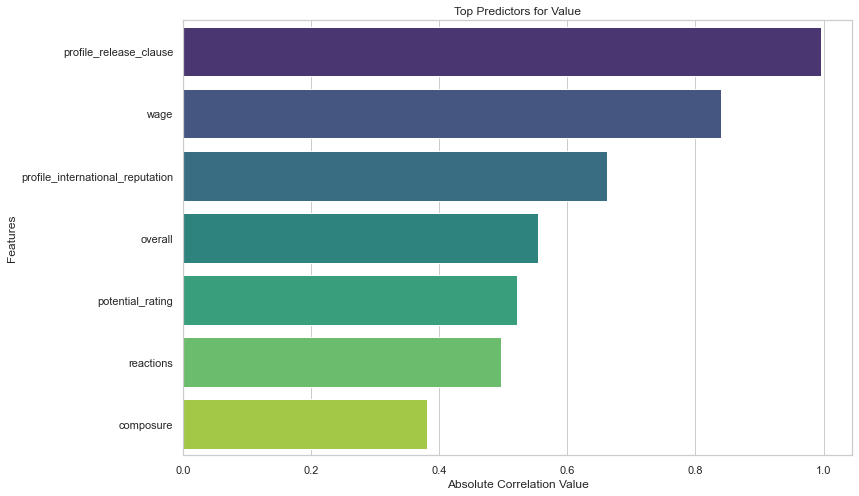

In [208]:

# Calculate the absolute correlation values
correlation_values = df_new.corr()['value'].abs().sort_values(ascending=False)

# Select the top predictors (excluding 'value_log' itself)
top_predictors = correlation_values[1:8]

# Plotting the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_predictors.values, y=top_predictors.index, palette='viridis')
plt.xlabel('Absolute Correlation Value')
plt.ylabel('Features')
plt.title('Top Predictors for Value')
plt.show()

## Baseline model with all columns

### Train-test split

In [356]:
# Define the target variable (Y) and features (X)
Xb = df_new.drop(columns=['value'])  # Remove 'value' and 'name' columns from features
yb = df_new['value']  # Target variable is 'value'

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(Xb, yb, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

In [357]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.5401778258184702
R-squared Score: 0.9922488780547373


### Model score

In [366]:
# Calculate MSE and R2
train_mse = mean_squared_error(y_train, model.predict(X_train))
train_r2 = r2_score(y_train, model.predict(X_train))
test_mse = mean_squared_error(y_test, model.predict(X_test))
test_r2 = r2_score(y_test, model.predict(X_test))

# Create a table for train and test metrics
metrics_table = [
    ['Train', train_mse, train_r2],
    ['Test', test_mse, test_r2]
]

headers = ['Dataset', 'Mean Squared Error', 'R-squared Score']

# Print the table using tabulate
print(tabulate(metrics_table, headers=headers, tablefmt='fancy_grid'))

╒═══════════╤══════════════════════╤═══════════════════╕
│ Dataset   │   Mean Squared Error │   R-squared Score │
╞═══════════╪══════════════════════╪═══════════════════╡
│ Train     │             0.517997 │          0.990832 │
├───────────┼──────────────────────┼───────────────────┤
│ Test      │             0.540178 │          0.992249 │
╘═══════════╧══════════════════════╧═══════════════════╛


In [107]:
def get_coefficients(model, features):
    # Get the coefficients and feature names
    coefficients = model.coef_
    feature_names = features.columns
    
    # Create a DataFrame to store feature names and coefficients
    coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    
    # Sort the DataFrame by coefficient values in descending order
    coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)
    
    # Convert coefficients to decimal format (if needed)
    coeff_df['Coefficient'] = coeff_df['Coefficient'].astype(float).round(decimals=4)  # Convert to float
    
    return coeff_df


### Model-coefficients

In [108]:
coefficients_df = get_coefficients(model, Xb)
print(coefficients_df)

                             Feature  Coefficient
6                               wage       2.0183
5   profile_international_reputation       0.6522
7             profile_release_clause       0.4950
1                            overall       0.0339
11                           volleys       0.0032
14                       fk_accuracy       0.0027
21                           balance       0.0026
15                      long_passing       0.0025
31               defensive_awareness       0.0025
3                             height       0.0024
4                             weight       0.0019
17                      acceleration       0.0018
20                         reactions       0.0016
30                         composure       0.0012
34                         gk_diving       0.0007
24                        long_shots       0.0007
28                            vision       0.0005
25                        aggression       0.0005
27                       positioning       0.0004


In [419]:

def plot_coefficients(coefficients_df, output_path=None):
    plt.figure(figsize=(10, 6))
    plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'])
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.title('Coefficients of the Linear Regression Model')
    plt.savefig('results/Analysis/Scatter Plot: Value vs Overall with Profile International Reputation.png')
    
    if output_path:
        plt.savefig(output_path)
    plt.show()
    

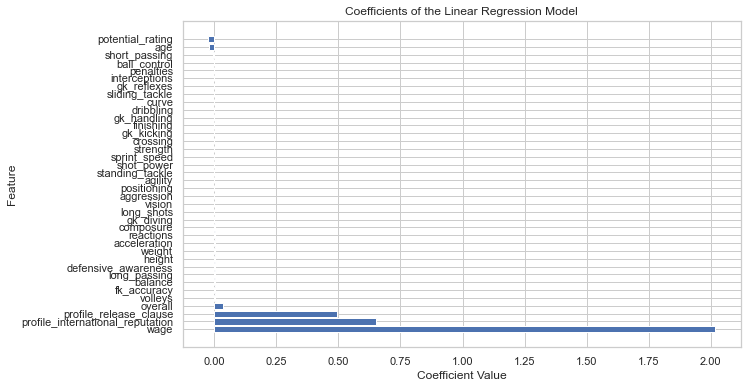

In [420]:
output_file = 'results/Analysis/model1_coefficients.png'
plot_coefficients(coefficients_df, output_path=output_file)

### Error distribution

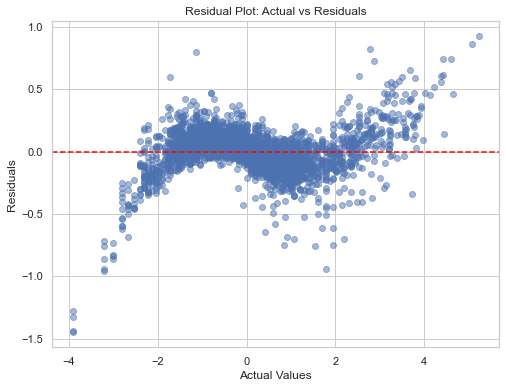

In [421]:
# Calculate the residuals
residuals = y_test - y_pred

# Plot the residuals against the actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot: Actual vs Residuals')
plt.savefig('results/Analysis/Error_ditribution_model1.png')
plt.show()

In [119]:
vif = pd.DataFrame()
vif["Feature"] = Xb.columns
vif["VIF"] = [variance_inflation_factor(Xb.values, i) for i in range(Xb.shape[1])]
print(vif)

                             Feature          VIF
0                                age   140.264494
1                            overall  1335.775349
2                   potential_rating   732.160695
3                             height   659.223497
4                             weight   368.921951
5   profile_international_reputation    20.503865
6                               wage     4.940508
7             profile_release_clause     4.412292
8                           crossing    63.165508
9                          finishing    96.527450
10                     short_passing   308.088345
11                           volleys    53.722784
12                         dribbling   186.058501
13                             curve    70.497104
14                       fk_accuracy    46.784185
15                      long_passing   132.582963
16                      ball_control   316.620713
17                      acceleration   181.836703
18                      sprint_speed   142.205443


## Feature Selection

In [215]:
col_rem = ['value']


# Create a new dataframe with the scaled and transformed columns
df_new3 = df_new.drop(col_rem, axis=1).copy()

# Attach the 'value_log' column from 'df_1' to 'df_new'
df_new3['value_log'] = df_1['value_log']

### Coorelation Heatmap

In [282]:
#View the correlations
corr_mat = df_new3.corr()

#Correlation With Value (most correlated with positive)
pd.DataFrame(corr_mat["value_log"]).sort_values("value_log", ascending=False).head(10)

,value_log
value_log,1.000000
overall,0.883445
potential_rating,0.843317
reactions,0.768240
profile_release_clause,0.640746
wage,0.639147
composure,0.616727
short_passing,0.553628
ball_control,0.512387
vision,0.509795


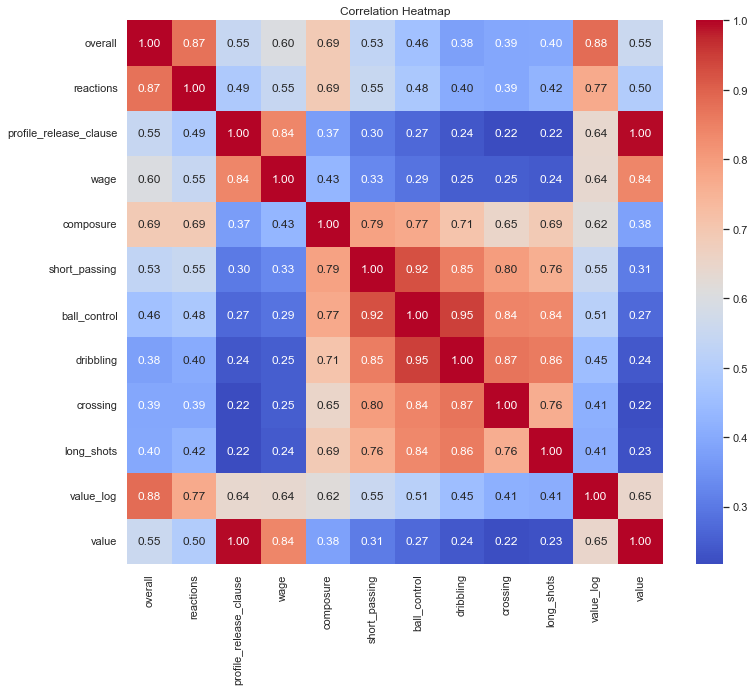

In [422]:
# Calculate the correlation matrix
corr_mat = df_new2.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.savefig('results/Analysis/coorelation_feature_selection.png')
plt.show()


In [283]:
#Correlation With Value (most correlated with positive)
pd.DataFrame(corr_mat["value_log"]).sort_values("value_log", ascending=False).head(20)

,value_log
value_log,1.000000
overall,0.883445
potential_rating,0.843317
reactions,0.768240
profile_release_clause,0.640746
wage,0.639147
composure,0.616727
short_passing,0.553628
ball_control,0.512387
vision,0.509795


/var/folders/xp/fzj8h07x52n24_x835lrmtbr0000gn/T/ipykernel_29039/1521453825.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_predictors.values, y=top_predictors.index, palette='viridis')


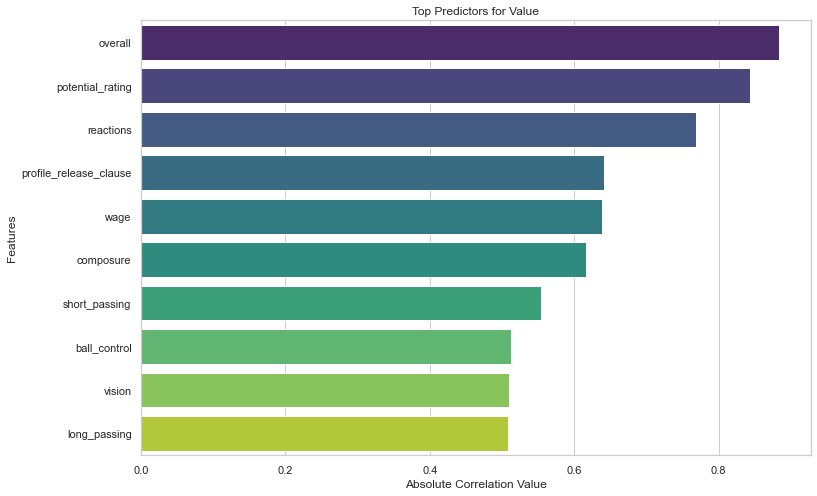

In [423]:
# Calculate the absolute correlation values
correlation_values = df_new3.corr()['value_log'].abs().sort_values(ascending=False)

# Select the top predictors (excluding 'value_log' itself)
top_predictors = correlation_values[1:11]

# Plotting the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_predictors.values, y=top_predictors.index, palette='viridis')
plt.xlabel('Absolute Correlation Value')
plt.ylabel('Features')
plt.title('Top Predictors for Value')
plt.savefig('results/Analysis/feature_selection.png')
plt.show()



In [285]:
col_to_int = [ 'overall', 'reactions', 'profile_release_clause','wage', 
              'composure', 'short_passing', 'ball_control', 'dribbling', 'crossing', 'long_shots']

df_new2 = df_new[col_to_int].copy()

df_new2['value_log'] = df_1['value_log']

In [351]:
col_to_int = [ 'overall', 'reactions', 'profile_release_clause','wage', 
              'composure', 'short_passing', 'ball_control', 'dribbling', 'crossing', 'long_shots']

df_new4 = df_new[col_to_int].copy()

df_new4['value'] = df_1['value']

### Independent variables (Feature selected) distribution

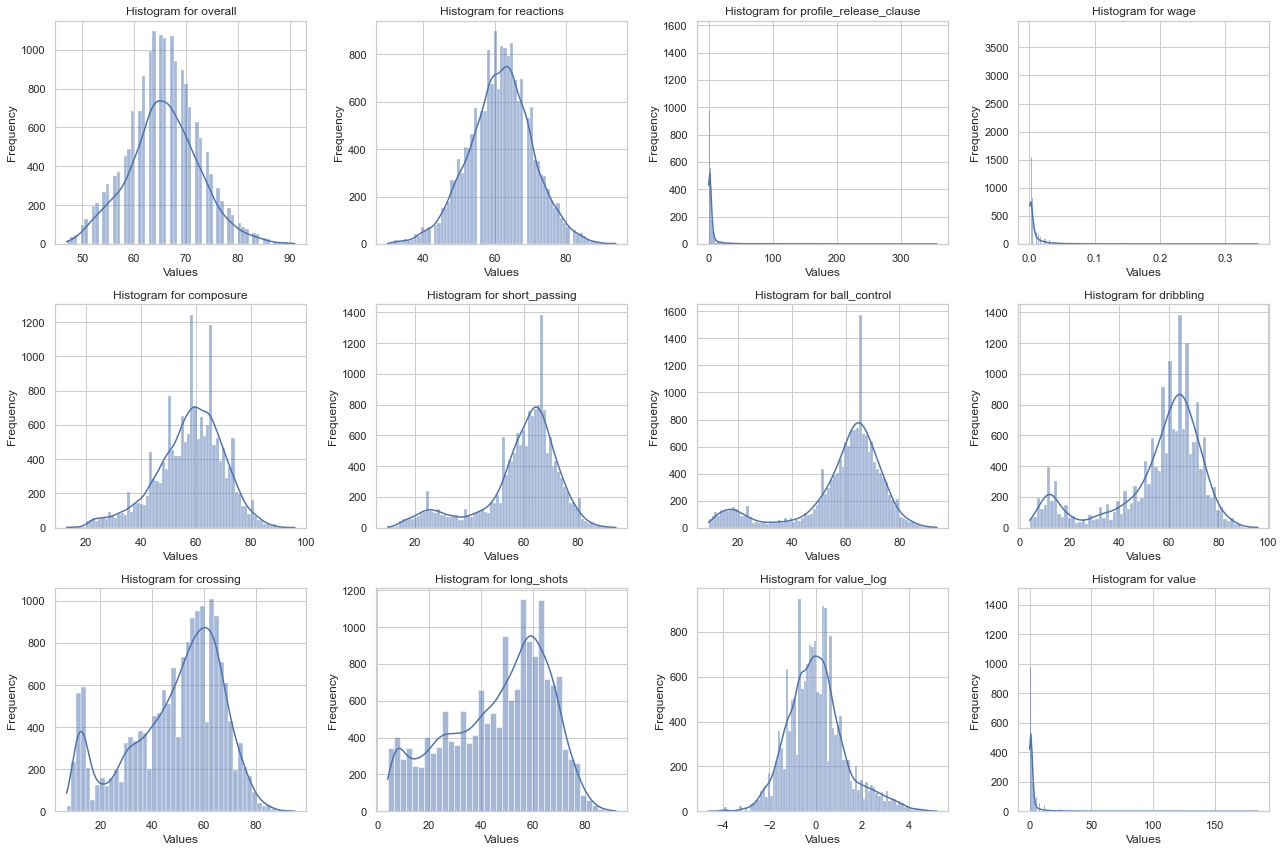

In [424]:
# Create subplots with a larger figure size
fig, axs = plt.subplots(nrows=3, ncols=len(df_new2.columns) // 3, figsize=(18, 12))

# Flatten the axs array for easier iteration
axs_flat = axs.flatten()

# Loop through each column and plot its histogram using displot
for i, column in enumerate(df_new2.columns):
    sns.histplot(df_new2[column], kde=True, bins='auto', ax=axs_flat[i])
    axs_flat[i].set_title(f'Histogram for {column}')
    axs_flat[i].set_xlabel('Values')
    axs_flat[i].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('results/Analysis/ditribution_feature_selection_variables.png')
plt.show()



### Features pairplots

<Figure size 1296x504 with 0 Axes>

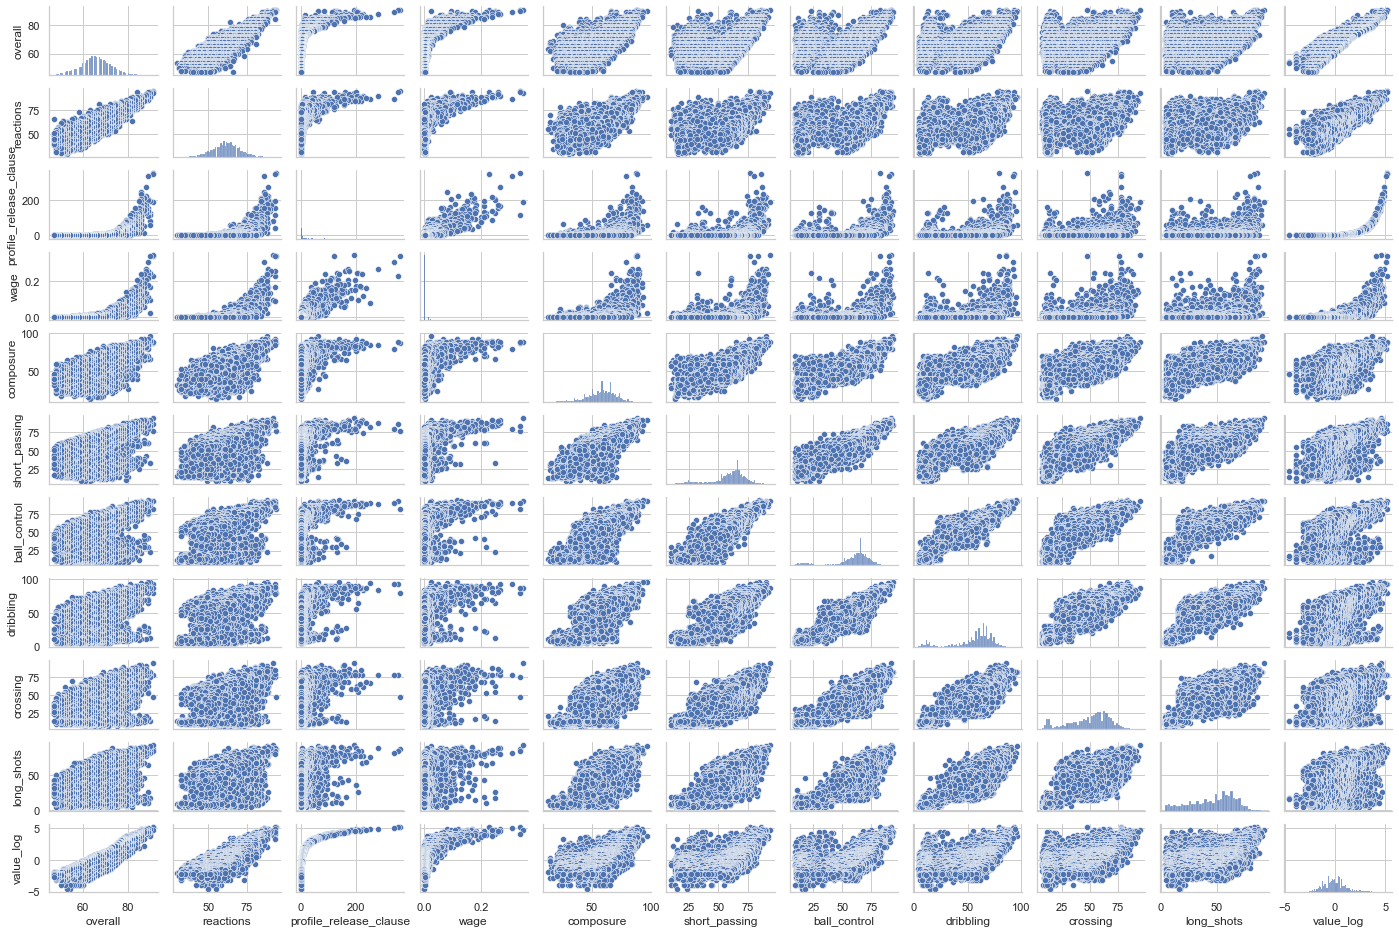

In [217]:
#Pairplot of selected features
plt.figure(1, figsize=(18, 7))
sns.set(style="whitegrid")
g=sns.pairplot(df_new2, height=1.2, aspect=1.5)
plt.yticks(rotation=90); 
plt.show()

### Model 2 

In [374]:
# Define the target variable (Y) and features (X)
X1 = df_new2.drop(columns=['value_log'])  # Remove 'value' and 'name' columns from features
y1 = df_new2['value_log']  # Target variable is 'value'

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model1 = LinearRegression()

# Fit the model on the training data
model1.fit(X_train, y_train)

# Make predictions on the testing data
y_pred1 = model1.predict(X_test)

In [375]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.23425190346765112
R-squared Score: 0.8488920330446458


### Model 2 Score:

In [377]:
# Calculate the MSE and R2 scores
train_mse1 = mean_squared_error(y_train, model1.predict(X_train))
test_mse1 = mean_squared_error(y_test, y_pred1)

train_r21 = r2_score(y_train, model1.predict(X_train))
test_r21 = r2_score(y_test, y_pred1)

# Create a DataFrame to store the scores
scores_df = pd.DataFrame({
    'Dataset': ['Train', 'Test'],
    'Mean Squared Error': [train_mse1, test_mse1],
    'R-squared Score': [train_r21, test_r21]
})

# Display the scores in a table format
print(scores_df)

╒════╤═══════════╤══════════════════════╤═══════════════════╕
│    │ Dataset   │   Mean Squared Error │   R-squared Score │
╞════╪═══════════╪══════════════════════╪═══════════════════╡
│  0 │ Train     │             0.240175 │          0.845544 │
├────┼───────────┼──────────────────────┼───────────────────┤
│  1 │ Test      │             0.234252 │          0.848892 │
╘════╧═══════════╧══════════════════════╧═══════════════════╛


In [222]:
coefficients_df1 = get_coefficients(model1, X1)
print(coefficients_df1)

                  Feature  Coefficient
0                 overall       0.1504
2  profile_release_clause       0.0185
7               dribbling       0.0175
6            ball_control       0.0101
5           short_passing       0.0013
1               reactions      -0.0048
9              long_shots      -0.0062
8                crossing      -0.0079
4               composure      -0.0178
3                    wage      -0.2099


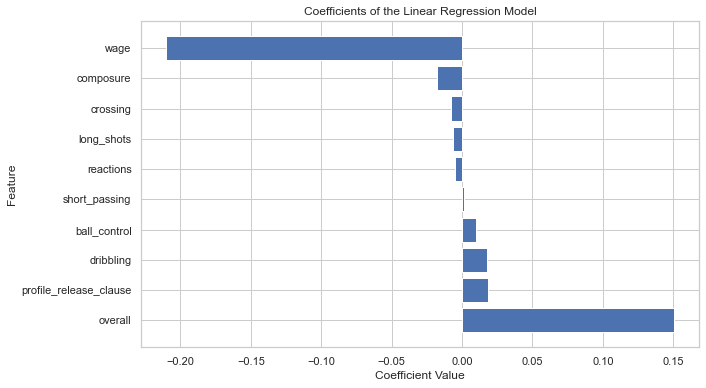

In [425]:
output_file = 'results/Analysis/model2_coefficients.png'
plot_coefficients(coefficients_df1, output_path=output_file)

## Model 3 set:

## Ridge, Lasso & Polynomial Regression

In [381]:
# Define the target variable (Y) and features (X)
X3 = df_new2.drop(columns=['value_log'])  # Remove 'value' and 'name' columns from features
y3 = df_new2['value_log']  # Target variable is 'value'

# Split data into train (%60), test(%20), and validation (%20)
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=10)

# Define the transformer and scaler
power_transformer = PowerTransformer()
robust_scaler = RobustScaler()

# Create a pipeline for preprocessing
preprocessor = make_pipeline(power_transformer, robust_scaler)

# Fit and transform the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)
X_test_preprocessed = preprocessor.transform(X_test)
X3_preprocessed = preprocessor.transform(X3)


poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train_preprocessed)
X_val_poly = poly.transform(X_val_preprocessed)
X_test_poly = poly.transform(X_test_preprocessed)

# Initialize the regression models
lm = LinearRegression()
ridge_model = Ridge(alpha=0.05)  
lm_lasso = Lasso(alpha=0.05)
lm_poly = LinearRegression()

# Fit the regression model on the training data
lm.fit(X_train_preprocessed, y_train)
ridge_model.fit(X_train_preprocessed, y_train)
lm_lasso.fit(X_train_preprocessed, y_train)
lm_poly.fit(X_train_poly, y_train)



LinearRegression()

In [253]:
# Calculate R-squared scores for train and test sets
def print_scores(model, X_train, X_test, y_train, y_test, model_name):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"{model_name} - Train R-squared: {train_score:.4f}")
    print(f"{model_name} - Test R-squared: {test_score:.4f}")

In [382]:
# Make predictions for each model
y_pred_lm = lm.predict(X_test_preprocessed)
y_pred_ridge = ridge_model.predict(X_test_preprocessed)
y_pred_lasso = lm_lasso.predict(X_test_preprocessed)
y_pred_poly = lm_poly.predict(X_test_poly)

In [384]:
# Calculate MSE and R2 for each model
metrics = []
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Polynomial Regression']
y_preds = [y_pred_lm, y_pred_ridge, y_pred_lasso, y_pred_poly]

for model, y_pred in zip(models, y_preds):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metrics.append([model, mse, r2])

# Create a DataFrame for the results
results_df = pd.DataFrame(metrics, columns=['Model', 'Test MSE', 'Test R2'])

# Convert DataFrame to tabular format
table = tabulate(results_df, headers='keys', tablefmt='fancy_grid', showindex=False)

print(table)

╒═══════════════════════╤════════════╤═══════════╕
│ Model                 │   Test MSE │   Test R2 │
╞═══════════════════════╪════════════╪═══════════╡
│ Linear Regression     │  0.0531268 │  0.965972 │
├───────────────────────┼────────────┼───────────┤
│ Ridge Regression      │  0.0531267 │  0.965972 │
├───────────────────────┼────────────┼───────────┤
│ Lasso Regression      │  0.0600216 │  0.961556 │
├───────────────────────┼────────────┼───────────┤
│ Polynomial Regression │  0.0255336 │  0.983646 │
╘═══════════════════════╧════════════╧═══════════╛


## Basic LR results

In [254]:
print_scores(lm, X_train_preprocessed, X_test_preprocessed, y_train, y_test, "Linear Regression")


Linear Regression - Train R-squared: 0.9588
Linear Regression - Test R-squared: 0.9593


## Ridge results

In [255]:
# Print scores for ridge regression
print_scores(ridge_model, X_train_preprocessed, X_test_preprocessed, y_train, y_test, "Ridge Regression")

Ridge Regression - Train R-squared: 0.9588
Ridge Regression - Test R-squared: 0.9593


## Lasso results

In [256]:
# Print scores for lasso regression
print_scores(lm_lasso, X_train_preprocessed, X_test_preprocessed, y_train, y_test, "Lasso Regression")


Lasso Regression - Train R-squared: 0.9545
Lasso Regression - Test R-squared: 0.9551


## Polynomial regression results

In [257]:
# Print scores for polynomial regression
print_scores(lm_poly, X_train_poly, X_test_poly, y_train, y_test, "Polynomial Regression")

Polynomial Regression - Train R-squared: 0.9791
Polynomial Regression - Test R-squared: 0.9782


### Model 3 coefficients:

In [252]:
coefficients_df_lr = get_coefficients(lm, X3)
print(coefficients_df_lr)

                  Feature  Coefficient
2  profile_release_clause       1.3850
0                 overall       0.2965
3                    wage       0.0601
7               dribbling       0.0596
6            ball_control       0.0524
5           short_passing       0.0304
1               reactions       0.0182
4               composure      -0.0181
8                crossing      -0.0431
9              long_shots      -0.0532


In [258]:
coefficients_df2 = get_coefficients(ridge_model, X3)
print(coefficients_df2)

                  Feature  Coefficient
2  profile_release_clause       1.3849
0                 overall       0.2966
3                    wage       0.0601
7               dribbling       0.0596
6            ball_control       0.0524
5           short_passing       0.0305
1               reactions       0.0182
4               composure      -0.0181
8                crossing      -0.0431
9              long_shots      -0.0532


In [259]:
coefficients_df3 = get_coefficients(lm_lasso, X3)
print(coefficients_df3)

                  Feature  Coefficient
2  profile_release_clause       1.3363
0                 overall       0.3101
6            ball_control       0.0387
3                    wage       0.0144
1               reactions       0.0000
4               composure       0.0000
5           short_passing       0.0000
7               dribbling       0.0000
8                crossing       0.0000
9              long_shots       0.0000


### Model Predictions & Results

In [335]:
# Predict on all data using the linear regression model (lm)
y_pred_all = lm.predict(X3_preprocessed)

# Take inverse log to get original values for predictions
y_pred_all_original = np.exp(y_pred_all)

# Inverse log transform the actual values
ys_actual = np.exp(y3)


In [336]:
df_all = pd.DataFrame({'Name': df_1['name'], 'Actual': ys_actual, 'Predicted': y_pred_all_original})
df_all["Difference"] = df_all["Actual"] - df_all["Predicted"]

# Sort and select top and bottom 10 under-predicted and over-predicted values
df_under = round(df_all.sort_values('Difference').head(10), 2)
df_over = round(df_all.sort_values('Difference', ascending=False).head(10), 2)

# Merge with df_1 to include names
df_under_with_names = pd.merge(df_under, df_1[['name']], left_index=True, right_index=True)
df_over_with_names = pd.merge(df_over, df_1[['name']], left_index=True, right_index=True)

# Rename the 'name' column to 'Name'
df_under_with_names = df_under_with_names.rename(columns={'name': 'Name'})
df_over_with_names = df_over_with_names.rename(columns={'name': 'Name'})

# Display the results
print("Under-predicted:")
print(df_under_with_names)
print("\nOver-predicted:")
print(df_over_with_names)

Under-predicted:
                  Name  Actual  Predicted  Difference              Name
139       Thiago Silva     7.5      10.74       -3.24      Thiago Silva
356        Raúl Albiol     4.6       7.79       -3.19       Raúl Albiol
194       Sergio Ramos     6.5       9.63       -3.13      Sergio Ramos
467        Jesús Navas     4.7       7.63       -2.93       Jesús Navas
612        Axel Witsel     6.0       8.72       -2.72       Axel Witsel
267           Fernando     8.5      10.83       -2.33          Fernando
456   Leonardo Bonucci     3.8       6.11       -2.31  Leonardo Bonucci
462      Dries Mertens     7.0       9.28       -2.28     Dries Mertens
1014       Daley Blind     5.0       7.26       -2.26       Daley Blind
1026       Raúl García     3.6       5.85       -2.25       Raúl García

Over-predicted:
                     Name  Actual  Predicted  Difference  \
0          Erling Haaland   185.0      25.84      159.16   
1           Kylian Mbappé   181.5      28.39      153.

### Error-plot

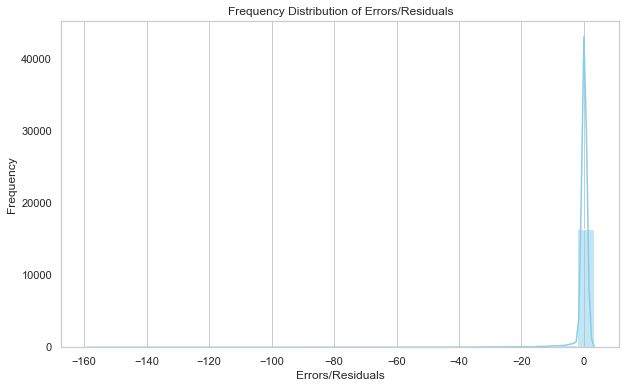

<Figure size 432x288 with 0 Axes>

In [398]:
# Calculate the errors or residuals
errors = y_pred_all_original - ys_actual

# Plot the histogram of errors
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color='skyblue', bins=30)
plt.title('Frequency Distribution of Errors/Residuals')
plt.xlabel('Errors/Residuals')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()
plt.savefig('results/Model_results/FinalModelError_Distribution.png')


In [295]:
df_difference = pd.DataFrame({
    'Name': df_1['name'],
    'Actual': ys_actual,
    'Predicted': y_pred_all_original,
    'Difference': ys_actual - y_pred_all_original
})

# Display the new DataFrame
print(df_difference.head())

               Name  Actual  Predicted  Difference
0    Erling Haaland   185.0  25.840823  159.159177
1     Kylian Mbappé   181.5  28.394705  153.105295
2   Kevin De Bruyne   103.0  25.442159   77.557841
3        Harry Kane   119.5  23.936145   95.563855
4  Thibaut Courtois    63.0  17.952728   45.047272


In [297]:
df_top_neg_diff

,Name,Actual,Predicted,Difference
139,Thiago Silva,7.5,10.741235,-3.241235
356,Raúl Albiol,4.6,7.787497,-3.187497
194,Sergio Ramos,6.5,9.629483,-3.129483
467,Jesús Navas,4.7,7.626002,-2.926002
612,Axel Witsel,6.0,8.724935,-2.724935
267,Fernando,8.5,10.834888,-2.334888
456,Leonardo Bonucci,3.8,6.108819,-2.308819
462,Dries Mertens,7.0,9.280445,-2.280445
1014,Daley Blind,5.0,7.264675,-2.264675
1026,Raúl García,3.6,5.849500,-2.249500


### Final plots: Under & overvalued players (focusing on 0-25million category)

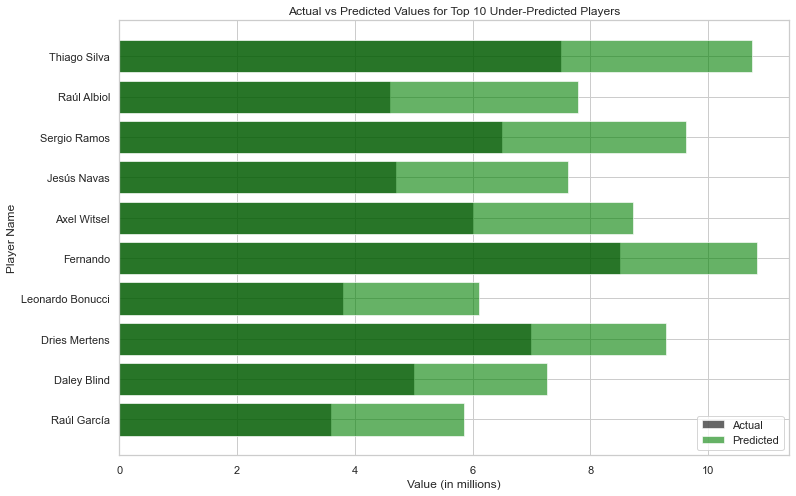

In [303]:
# Sort the DataFrame by 'Difference' column in ascending order to get top negative differences
df_top_neg_diff = df_difference.sort_values('Difference').head(10)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create an array for the player names
players = df_top_neg_diff['Name']
y_pos = np.arange(len(players))

# Plot actual values as bars
plt.barh(y_pos, df_top_neg_diff['Actual'], color='black', label='Actual', alpha=0.6)

# Plot predicted values as bars
plt.barh(y_pos, df_top_neg_diff['Predicted'], color='green', label='Predicted', alpha=0.6)

# Set y-axis ticks and labels
plt.yticks(y_pos, players)
plt.xlabel('Value (in millions)')
plt.ylabel('Player Name')
plt.title('Actual vs Predicted Values for Top 10 Under-Predicted Players')
plt.legend()

# Show the plot
plt.gca().invert_yaxis()  # Invert y-axis to have highest difference at the top
plt.show()

In [399]:

def plot_player_comparison(df, output_path=None):
    plt.figure(figsize=(10, 6))
    # Set the width of the bars
    bar_width = 0.4

    # Set the position of the bars on the x-axis
    index = range(len(df))

    # Plot actual values
    rects1 = plt.bar(index, df['Actual'], color='black', width=bar_width, label='Actual')

    # Plot predicted values
    rects2 = plt.bar([i + bar_width for i in index], df['Predicted'], color='orange', width=bar_width, label='Predicted')

    # Add value labels on top of each bar
    for rect in rects1:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

    for rect in rects2:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

    # Customize the plot
    plt.xlabel('Player Name')
    plt.ylabel('Value')
    plt.title('Actual vs Predicted Values')
    plt.xticks([i + bar_width / 2 for i in index], df['Name'], rotation=90)
    plt.legend()
    plt.tight_layout()
    
        # Save the plot if output_path is provided
    if output_path:
        plt.savefig(output_path)
    plt.show()

    # Show the plot
    plt.show()

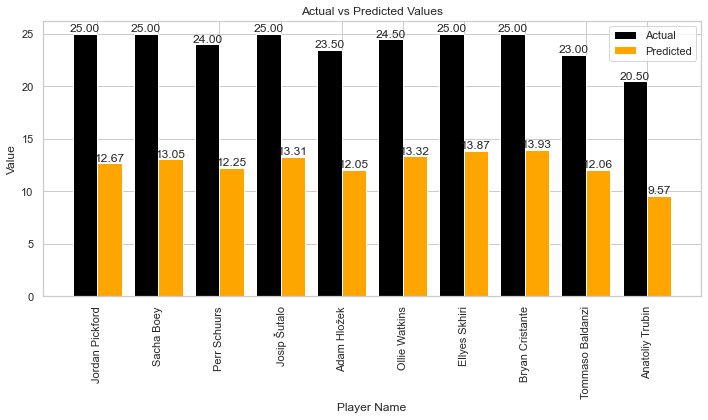

In [401]:
# Plot side-by-side comparison for top over-predicted players
output_file = 'results/Model_results/over_value_players.png'
plot_player_comparison(df_top_over, output_path=output_file)

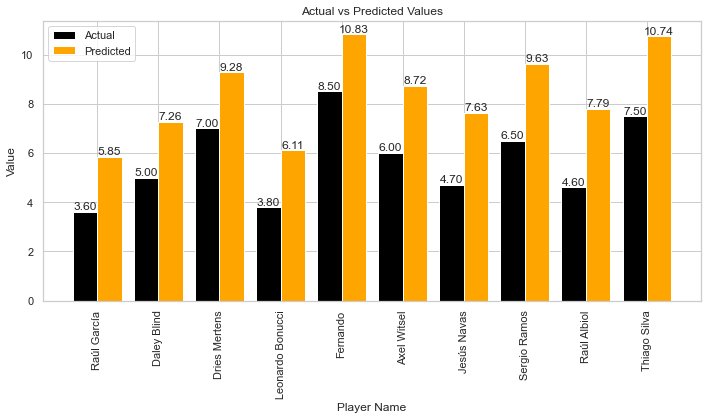

In [403]:
# Plot side-by-side comparison for top over-predicted players
output_file = 'results/Model_results/under_value_players.png'
plot_player_comparison(df_top_under, output_path=output_file)